# Notebook 05 — Final Report Generation
#### This notebook creates visualizations and exports the final structured report summarizing issues, insights, and recommendations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Plot settings
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("../outputs/intermediate_files/cleaned_data.csv")

with open("../reports/structured_outputs/issues_report.json") as f:
    issues = json.load(f)

with open("../reports/structured_outputs/insights_recommendations.json") as f:
    insights = json.load(f)

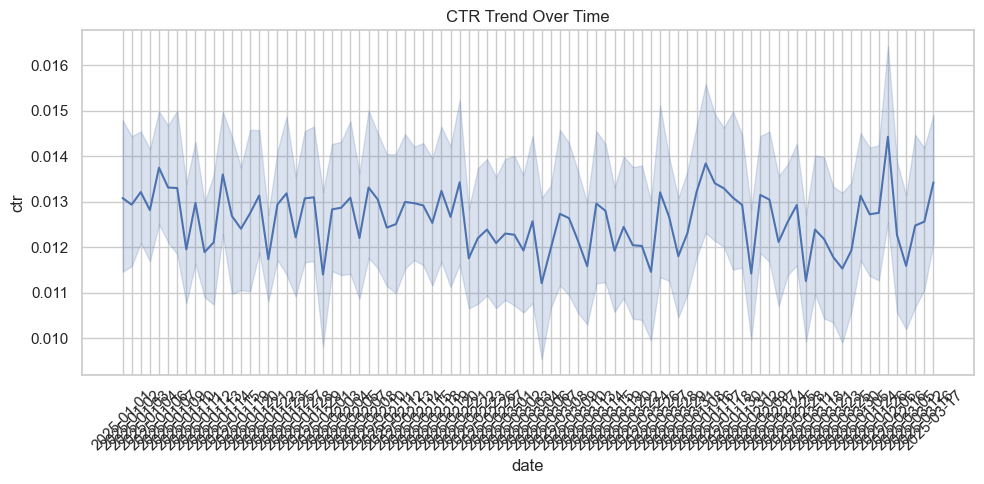

In [3]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="date", y="ctr")
plt.title("CTR Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../reports/visualizations/ctr_trend.png")
plt.show()

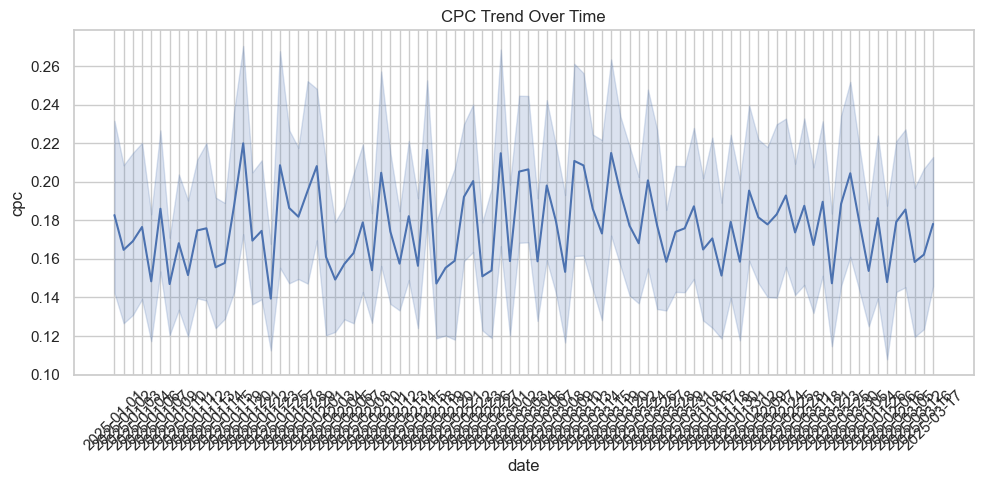

In [4]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="date", y="cpc")
plt.title("CPC Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../reports/visualizations/cpc_trend.png")
plt.show()

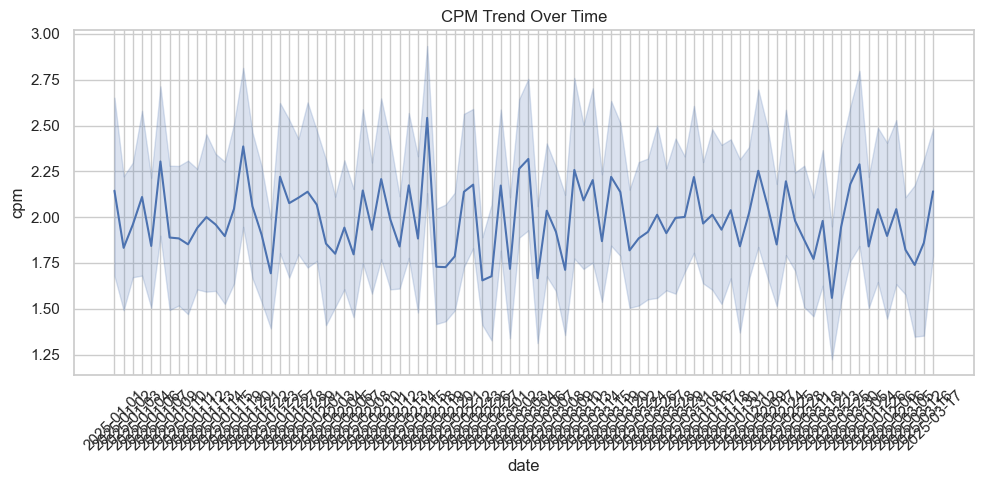

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="date", y="cpm")
plt.title("CPM Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../reports/visualizations/cpm_trend.png")
plt.show()

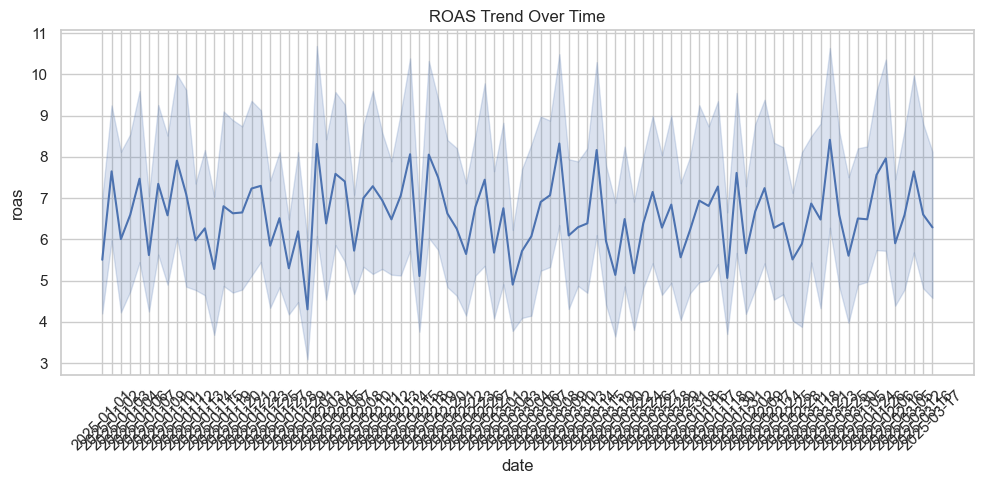

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="date", y="roas")
plt.title("ROAS Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../reports/visualizations/roas_trend.png")
plt.show()

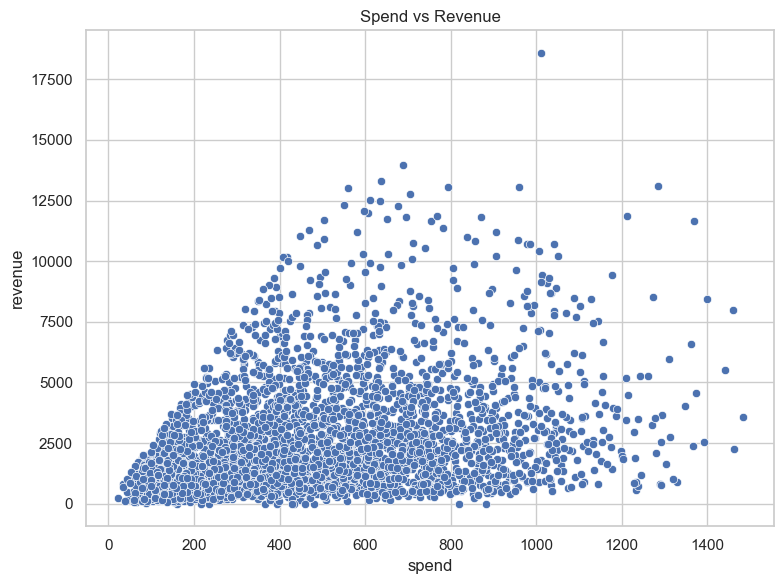

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="spend", y="revenue")
plt.title("Spend vs Revenue")
plt.tight_layout()
plt.savefig("../reports/visualizations/spend_vs_revenue.png")
plt.show()

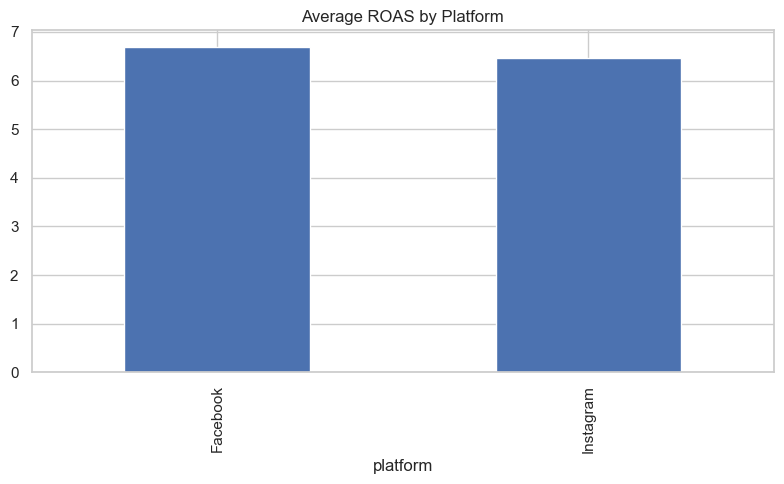

In [8]:
plt.figure(figsize=(8,5))
df.groupby("platform")["roas"].mean().plot(kind="bar")
plt.title("Average ROAS by Platform")
plt.tight_layout()
plt.savefig("../reports/visualizations/platform_roas.png")
plt.show()

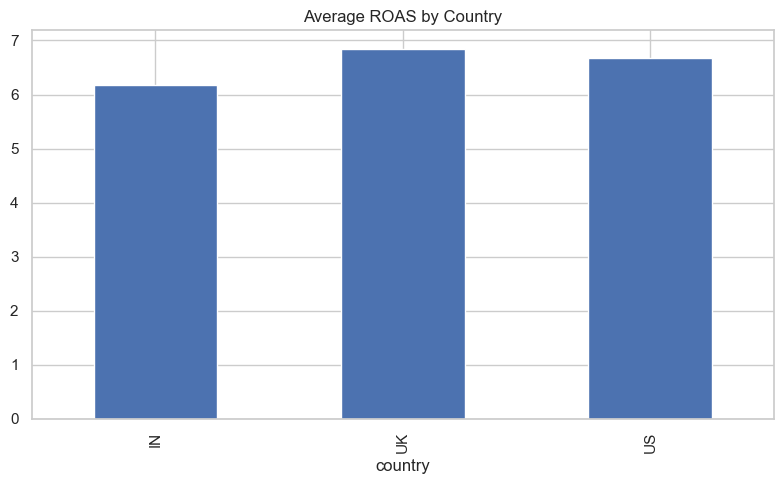

In [9]:
plt.figure(figsize=(8,5))
df.groupby("country")["roas"].mean().plot(kind="bar")
plt.title("Average ROAS by Country")
plt.tight_layout()
plt.savefig("../reports/visualizations/country_roas.png")
plt.show()

In [10]:
report_md = f"""
# Final Facebook Ads Performance Report

## 1. Key Issues Identified
- {issues['high_cpc_campaigns']} campaigns have high CPC
- {issues['low_roas_campaigns']} campaigns have low ROAS
- {issues['low_ctr_creatives']} creatives have low CTR
- {issues['high_cpm_campaigns']} campaigns have high CPM

## 2. Insights
{json.dumps(insights['insights'], indent=4)}

## 3. Recommendations
{json.dumps(insights['recommendations'], indent=4)}

## 4. Visualizations
All charts are stored in `reports/visualizations/`.
"""

with open("../reports/presentations/final_report.md", "w") as f:
    f.write(report_md)

print("Report markdown saved.")

Report markdown saved.
